In [3]:
###  THIS WORK IS NOT COMPLETE> WORK IN PROGRESS
#Data Sources:
#Flights: Bureau of Transportation Statistics On-Time data (https://www.transtats.bts.gov/ONTIME/)
#Weather: NOAA Daily Summary (https://www.ncdc.noaa.gov/cdo-web/datatools)
#Airport Cordinates: Open Flights (https://openflights.org/data.html)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dfAug = pd.read_csv('AUG.csv')
dfSep = pd.read_csv('SEP.csv')
df=pd.concat([dfAug,dfSep])
del dfAug
del dfSep

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
len(df)

969178

In [5]:
#dfAug.iloc[0:15,46:62]

In [6]:
df.drop(['OP_CARRIER_AIRLINE_ID','OP_UNIQUE_CARRIER','ORIGIN_AIRPORT_SEQ_ID',
            'ORIGIN_STATE_FIPS','DEST_AIRPORT_SEQ_ID','DEST_STATE_FIPS','DEP_DELAY_GROUP','WHEELS_OFF',
           'WHEELS_ON','ARR_DELAY_GROUP','ARR_TIME_BLK','ARR_TIME_BLK','DIV_ACTUAL_ELAPSED_TIME','DIV1_AIRPORT_SEQ_ID',
            'DIV1_WHEELS_ON','DIV1_TOTAL_GTIME','DIV1_LONGEST_GTIME','DIV1_TAIL_NUM'],axis=1,inplace=True)

In [7]:
df.iloc[0:10,10:22]

ORIGIN_CITY_MARKET_ID ORIGIN  ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
0                  31703    LGA      New York, NY               NY   
1                  34819    SJU      San Juan, PR               PR   
2                  30721    BOS        Boston, MA               MA   
3                  32457    SJC      San Jose, CA               CA   
4                  30721    PVD    Providence, RI               RI   
5                  31454    MCO       Orlando, FL               FL   
6                  31703    JFK      New York, NY               NY   
7                  31136    JAX  Jacksonville, FL               FL   
8                  30852    DCA    Washington, DC               VA   
9                  31714    RSW    Fort Myers, FL               FL   

  ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  DEST_CITY_MARKET_ID DEST  \
0        New York          22            14027                34027  PBI   
1     Puerto Rico           3            10721                30721  BOS   
2   Massachusetts          13            14831                32457  SJC   
3      California          91            10721                30721  BOS   
4    Rhode Island          15            13204                31454  MCO   
5         Florida          33            14307                30721  PVD   
6        New York          22            12451                31136  JAX   
7         Florida          33            12478                31703  JFK   
8        Virginia          38            14635                31714  RSW   
9         Florida          33            11278                30852  DCA   

                   DEST_CITY_NAME DEST_STATE_ABR  DEST_STATE_NM  
0  West Palm Beach/Palm Beach, FL             FL        Florida  
1                      Boston, MA             MA  Massachusetts  
2                    San Jose, CA             CA     California  
3                      Boston, MA             MA  Massachusetts  
4                     Orlando, FL             FL        Florida  
5                  Providence, RI             RI   Rhode Island  
6                Jacksonville, FL             FL        Florida  
7                    New York, NY             NY       New York  
8                  Fort Myers, FL             FL        Florida  
9                  Washington, DC             VA       Virginia

In [8]:
df[df['ORIGIN']=='IAH'].iloc[0:10,10:26]

ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
16611                  31453    IAH      Houston, TX               TX   
16688                  31453    IAH      Houston, TX               TX   
16748                  31453    IAH      Houston, TX               TX   
16758                  31453    IAH      Houston, TX               TX   
16942                  31453    IAH      Houston, TX               TX   
16958                  31453    IAH      Houston, TX               TX   
16980                  31453    IAH      Houston, TX               TX   
17048                  31453    IAH      Houston, TX               TX   
17093                  31453    IAH      Houston, TX               TX   
17183                  31453    IAH      Houston, TX               TX   

      ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  DEST_CITY_MARKET_ID DEST  \
16611           Texas          74            11042                30647  CLE   
16688           Texas          74            11292                30325  DEN   
16748           Texas          74            11292                30325  DEN   
16758           Texas          74            10397                30397  ATL   
16942           Texas          74            12889                32211  LAS   
16958           Texas          74            11193                33105  CVG   
16980           Texas          74            11292                30325  DEN   
17048           Texas          74            11292                30325  DEN   
17093           Texas          74            14100                34100  PHL   
17183           Texas          74            11042                30647  CLE   

         DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_NM  DEST_WAC  CRS_DEP_TIME  \
16611     Cleveland, OH             OH          Ohio        44          1620   
16688        Denver, CO             CO      Colorado        82          1059   
16748        Denver, CO             CO      Colorado        82          1936   
16758       Atlanta, GA             GA       Georgia        34          1825   
16942     Las Vegas, NV             NV        Nevada        85          1620   
16958    Cincinnati, OH             KY      Kentucky        52          1515   
16980        Denver, CO             CO      Colorado        82          1059   
17048        Denver, CO             CO      Colorado        82          1936   
17093  Philadelphia, PA             PA  Pennsylvania        23          1718   
17183     Cleveland, OH             OH          Ohio        44          1620   

       DEP_TIME  DEP_DELAY  
16611    1613.0       -7.0  
16688    1056.0       -3.0  
16748    1933.0       -3.0  
16758    1819.0       -6.0  
16942    1640.0       20.0  
16958    1539.0       24.0  
16980    1103.0        4.0  
17048    1932.0       -4.0  
17093    2135.0      257.0  
17183    1609.0      -11.0

In [9]:
houFlights = df[(df['ORIGIN_CITY_MARKET_ID']==31453)|(df['DEST_CITY_MARKET_ID']==31453)]
del df

In [10]:
len(houFlights)

59830

In [11]:
houFlights.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DIV_AIRPORT_LANDINGS', 'DIV_REACHED_DEST', 'DIV_ARR_DELAY',
       'DIV_DISTANCE', 'DIV1_AIRPORT', 'DIV1_AIRPORT_ID', 'DIV1_WHEELS_OFF',
       'Unnamed: 68'],
      dtype='object')

In [12]:
houFlights[(houFlights['ORIGIN_CITY_MARKET_ID']==31453)&(houFlights['DEST_CITY_MARKET_ID']==31453)]

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, DAY_OF_WEEK, FL_DATE, OP_CARRIER, TAIL_NUM, OP_CARRIER_FL_NUM, ORIGIN_AIRPORT_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, ORIGIN_STATE_NM, ORIGIN_WAC, DEST_AIRPORT_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, DEST_STATE_NM, DEST_WAC, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DEL15, TAXI_OUT, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, ARR_DEL15, CANCELLED, CANCELLATION_CODE, DIVERTED, AIR_TIME, DISTANCE, DISTANCE_GROUP, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, DIV_AIRPORT_LANDINGS, DIV_REACHED_DEST, DIV_ARR_DELAY, DIV_DISTANCE, DIV1_AIRPORT, DIV1_AIRPORT_ID, DIV1_WHEELS_OFF, Unnamed: 68]
Index: []

[0 rows x 52 columns]

There are no flights with both Origin and Destination as Houston

## Feature Engineering

In [13]:
#houFlights['DAY_OF_WEEK_NAME'] = houFlights['FL_DATE'].dt.day_name()
houFlights['DATE'] = pd.to_datetime(houFlights['FL_DATE'],format='%Y-%m-%d')
houFlights['DAY_OF_WEEK_NAME'] = houFlights['DATE'].dt.weekday_name

In [14]:
houFlights['DEP_DELAY'] = houFlights['DEP_DELAY'].apply(lambda x:0.0 if x<0 else x)
houFlights['ARR_DELAY'] = houFlights['ARR_DELAY'].apply(lambda x:0.0 if x<0 else x)

In [15]:
airlineMap = {'UA':'United','WN':'Southwest','EV':'ExpressJet','OO':'SkyWest','NK':'Spirit','AA':'American',
              'DL':'Delta','F9':'Frontier','B6':'JetBlue','AS':'Alaska'}
houFlights['CARRIER_NAME'] =  houFlights['OP_CARRIER'].map(airlineMap)

In [16]:
houFlights[(houFlights['CANCELLED']==1) & (houFlights['DIVERTED']==1)]

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, DAY_OF_WEEK, FL_DATE, OP_CARRIER, TAIL_NUM, OP_CARRIER_FL_NUM, ORIGIN_AIRPORT_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, ORIGIN_STATE_NM, ORIGIN_WAC, DEST_AIRPORT_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, DEST_STATE_NM, DEST_WAC, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DEL15, TAXI_OUT, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, ARR_DEL15, CANCELLED, CANCELLATION_CODE, DIVERTED, AIR_TIME, DISTANCE, DISTANCE_GROUP, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, DIV_AIRPORT_LANDINGS, DIV_REACHED_DEST, DIV_ARR_DELAY, DIV_DISTANCE, DIV1_AIRPORT, DIV1_AIRPORT_ID, DIV1_WHEELS_OFF, Unnamed: 68, DATE, DAY_OF_WEEK_NAME, CARRIER_NAME]
Index: []

[0 rows x 55 columns]

In [17]:
len(houFlights)

59830

In [18]:
def getFlightStatus(args):
    if args[0] == 1:
        return 'Cancelled'
    elif args[1] == 1:
        return 'Diverted'
    else:
        return 'Completed'
    
def getCompleted(args):
    if ((int(args[0]) == 1) |( int(args[1]) == 1)):
        return 0
    else:
        return 1

In [19]:
houFlights['STATUS'] = houFlights[['CANCELLED','DIVERTED']].apply(getFlightStatus,axis=1)
houFlights['COMPLETED'] = houFlights[['CANCELLED','DIVERTED']].apply(getCompleted,axis=1)

In [20]:
#Inbound/Outbound
houFlights['INBOUND'] = houFlights['DEST_CITY_NAME'].apply(lambda x: 1 if x == 'Houston, TX' else 0)

In [21]:
houFlights['DEP_HR_BLOCK'] = (houFlights['CRS_DEP_TIME']/100).astype(int)
houFlights['ARR_HR_BLOCK'] = (houFlights['CRS_ARR_TIME']/100).astype(int)

## Airport Data

In [22]:
airports = pd.read_csv('airports.csv')
houFlights = pd.merge(houFlights,airports[['Code3','Lat','Lon']],left_on='ORIGIN',right_on='Code3',suffixes=['','_Ori'])
houFlights = pd.merge(houFlights,airports[['Code3','Lat','Lon']],left_on='DEST',right_on='Code3',suffixes=['','_Dest'])
houFlights.rename(columns={'Lat':'Lat_Ori','Lon':'Lon_Ori'}, inplace=True)
houFlights.drop(['Code3','Code3_Dest'],axis=1,inplace=True)

In [23]:
#Westbound Eastbound
houFlights['DIRECTION'] = houFlights.apply(lambda x:'EASTBOUND' if (x['Lon_Ori']<x['Lon_Dest']) else 'WESTBOUND',axis=1)

In [24]:
len(houFlights)

59830

In [25]:
airports.head()

ID                                         Name          City  \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

            Country Code3 Code4       Lat         Lon  Altitude TimeZone DST  \
0  Papua New Guinea   GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea   MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea   HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea   LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea   POM  AYPY -9.443380  147.220001       146       10   U   

               TimeZOne     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [26]:
def setDivAirport(divApt):
    if (divApt != np.NaN):
        for  a in airports.items():
            if(divApt== a['Code3']):
                print(divApt)
    else:
        print('None')
        #return (np.NaN,np.NaN)
    

In [30]:
gByOriDest = houFlights[houFlights['INBOUND']==1].groupby(['ORIGIN','Lat_Ori','Lon_Ori','DEST','Lat_Dest','Lon_Dest']).size().reset_index()
gByOriDest.rename(columns={0:'Count'}, inplace=True)

In [32]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.graph_objs as go
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.plotly as py

airportsMap = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = gByOriDest['Lon_Ori'],
        lat = gByOriDest['Lat_Ori'],
        hoverinfo = 'text',
        text = gByOriDest['ORIGIN'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]


flight_paths = []
for i in range( len(gByOriDest) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ gByOriDest['Lon_Ori'][i], gByOriDest['Lon_Dest'][i] ],
            lat = [ gByOriDest['Lat_Ori'][i], gByOriDest['Lat_Dest'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = (float(gByOriDest['Count'][i])/float(gByOriDest['Count'].max())),
        )
    )




layout = dict(geo={'scope':'usa'},
             showlegend=False)

fig = dict(data = flight_paths +airportsMap,layout=layout)
iplot(fig)

### Countplots

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

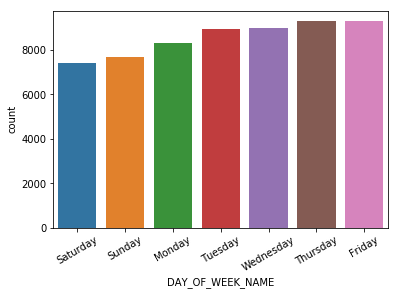

In [33]:
sns.countplot(data=houFlights,x='DAY_OF_WEEK_NAME')
plt.xticks(rotation=30)

In [34]:
"1","Monday"
"2","Tuesday"
"3","Wednesday"
"4","Thursday"
"5","Friday"
"6","Saturday"
"7","Sunday"

('7', 'Sunday')

In [35]:
houFlights['OP_CARRIER'].value_counts()

UA    18879
WN    16941
EV    13887
OO     2773
NK     2500
AA     2348
DL     1525
F9      528
B6      244
AS      205
Name: OP_CARRIER, dtype: int64

In [36]:
houFlights['OP_CARRIER'].head()

0    B6
1    B6
2    B6
3    B6
4    B6
Name: OP_CARRIER, dtype: object

In [37]:
houFlights['CARRIER_NAME'].value_counts()

United        18879
Southwest     16941
ExpressJet    13887
SkyWest        2773
Spirit         2500
American       2348
Delta          1525
Frontier        528
JetBlue         244
Alaska          205
Name: CARRIER_NAME, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

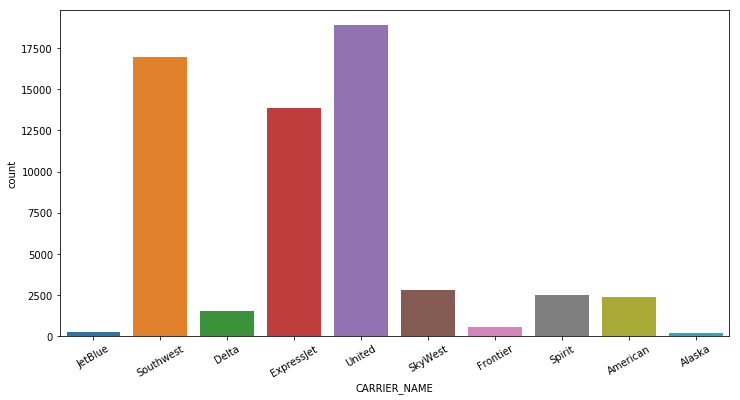

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights,x='CARRIER_NAME')
plt.xticks(rotation=30)

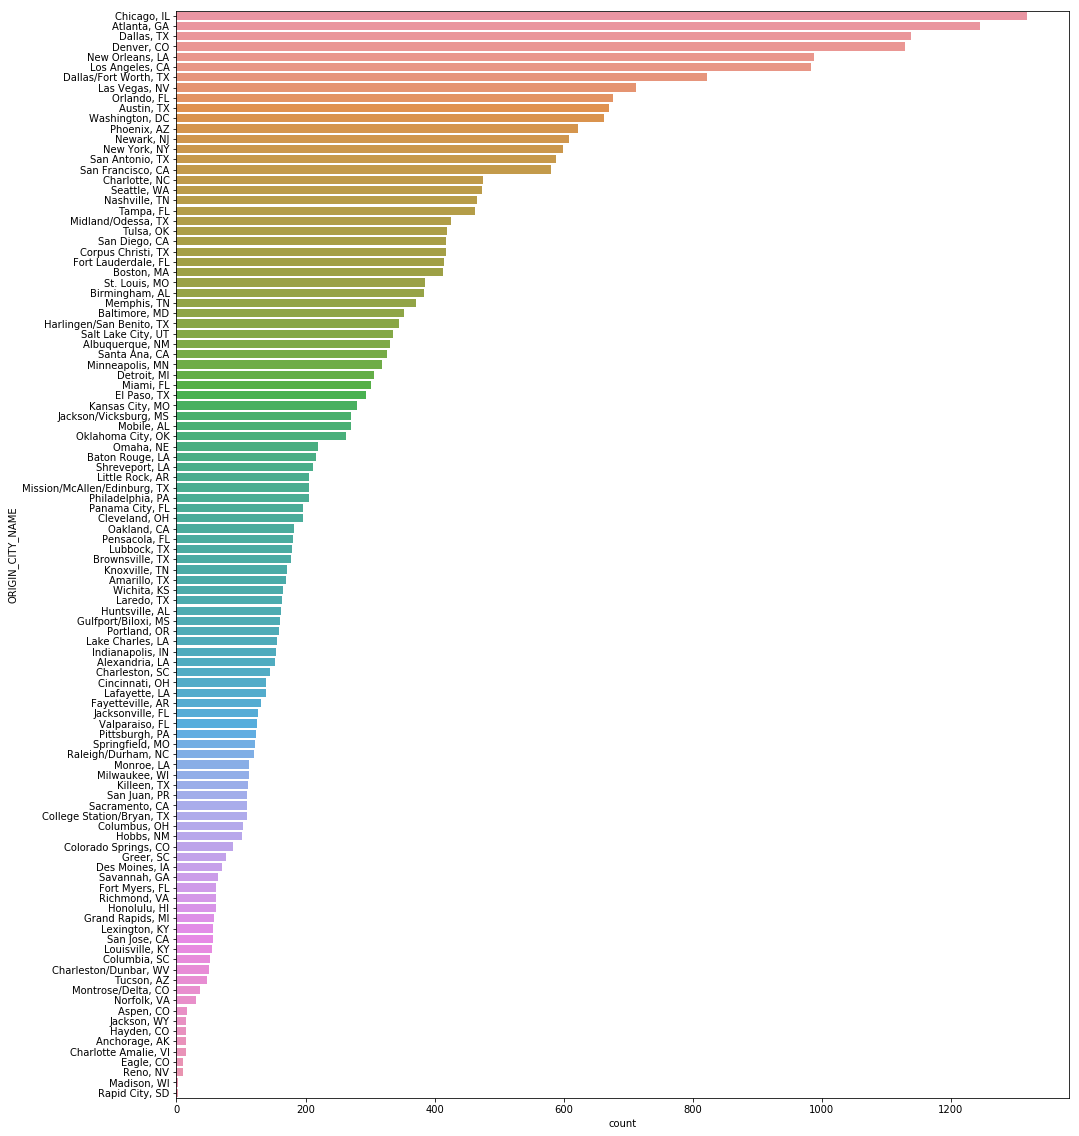

In [39]:
plt.figure(figsize=(16,20))
sns.countplot(data=houFlights[houFlights['ORIGIN_CITY_NAME']!='Houston, TX'],y='ORIGIN_CITY_NAME',
             order = houFlights[houFlights['ORIGIN_CITY_NAME']!='Houston, TX']['ORIGIN_CITY_NAME'].value_counts().index)

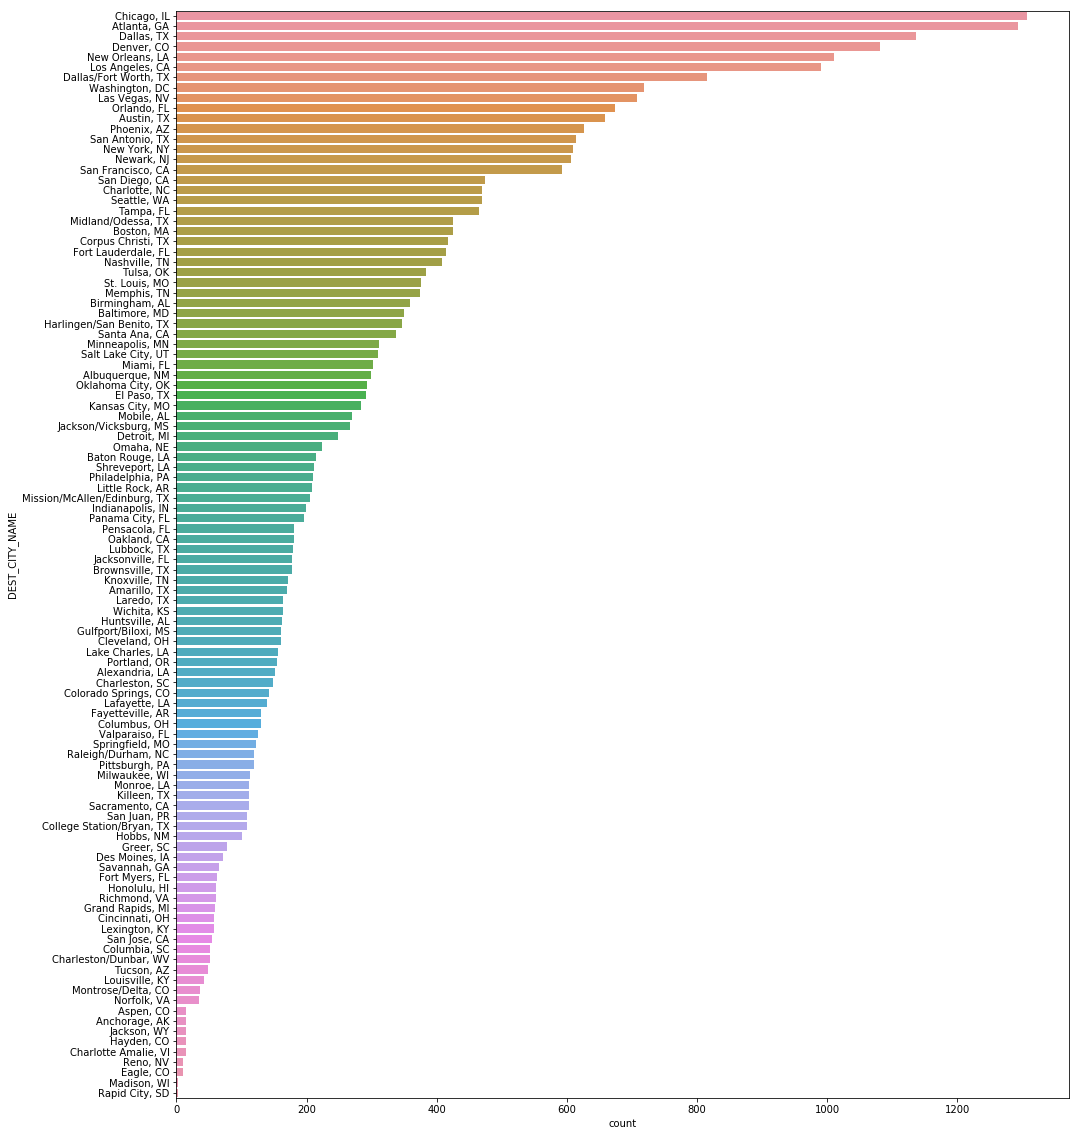

In [40]:
plt.figure(figsize=(16,20))
sns.countplot(data=houFlights[houFlights['DEST_CITY_NAME']!='Houston, TX'],y='DEST_CITY_NAME',
             order = houFlights[houFlights['DEST_CITY_NAME']!='Houston, TX']['DEST_CITY_NAME'].value_counts().index)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

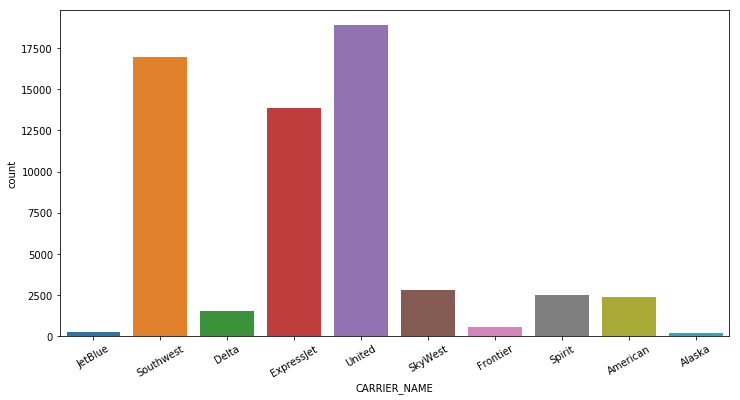

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights,x='CARRIER_NAME')
plt.xticks(rotation=30)

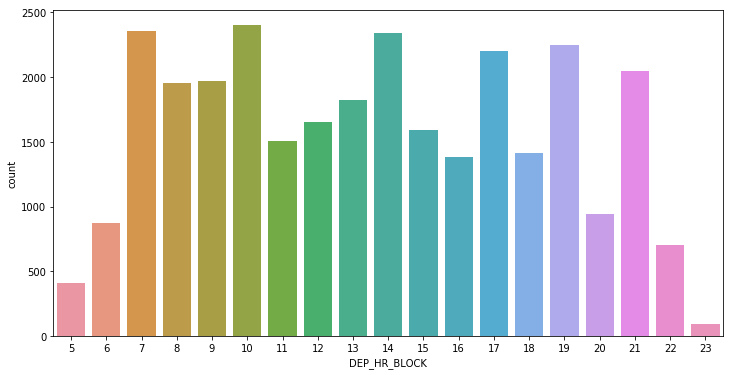

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights[houFlights['ORIGIN_CITY_NAME']=='Houston, TX'],x='DEP_HR_BLOCK')

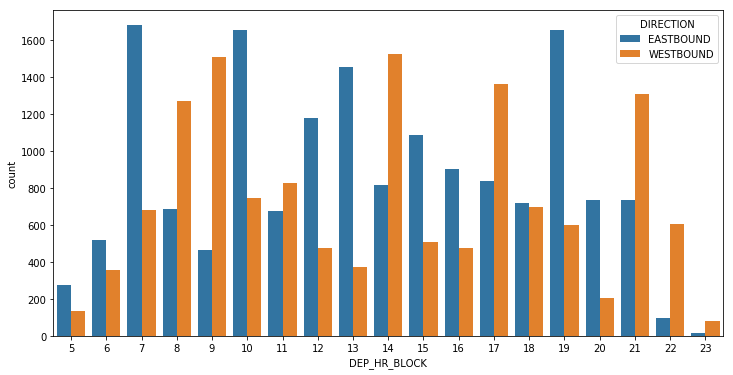

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights[houFlights['ORIGIN_CITY_NAME']=='Houston, TX'],x='DEP_HR_BLOCK',hue='DIRECTION')

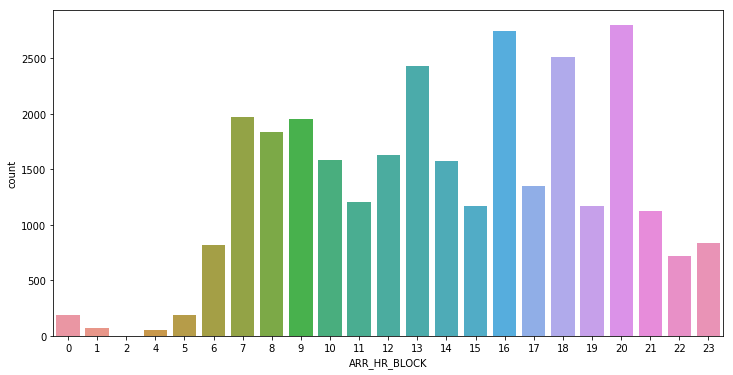

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights[houFlights['DEST_CITY_NAME']=='Houston, TX'],x='ARR_HR_BLOCK')

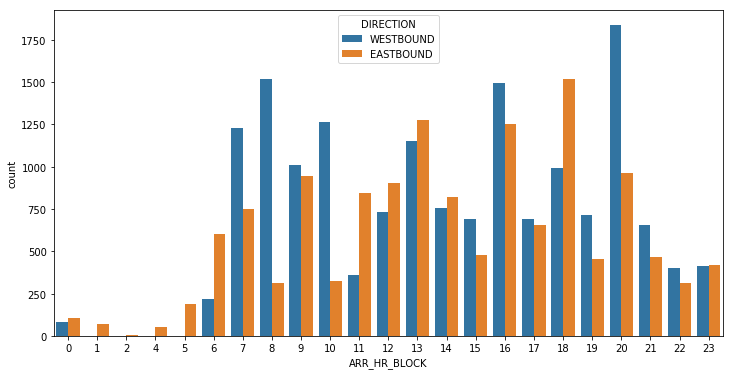

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights[houFlights['DEST_CITY_NAME']=='Houston, TX'],x='ARR_HR_BLOCK',hue='DIRECTION')

In [46]:
houFlights.iloc[0:10,1:22]

QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE OP_CARRIER TAIL_NUM  \
0        3      8            12            6  2017-08-12         B6   N520JB   
1        3      8            13            7  2017-08-13         B6   N579JB   
2        3      8            14            1  2017-08-14         B6   N559JB   
3        3      8            15            2  2017-08-15         B6   N526JB   
4        3      8            16            3  2017-08-16         B6   N648JB   
5        3      8            17            4  2017-08-17         B6   N547JB   
6        3      8            18            5  2017-08-18         B6   N629JB   
7        3      8            19            6  2017-08-19         B6   N827JB   
8        3      8            20            7  2017-08-20         B6   N510JB   
9        3      8            21            1  2017-08-21         B6   N568JB   

   OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_CITY_MARKET_ID      ...       \
0                581              12478                  31703      ...        
1                581              12478                  31703      ...        
2                581              12478                  31703      ...        
3                581              12478                  31703      ...        
4                581              12478                  31703      ...        
5                581              12478                  31703      ...        
6                581              12478                  31703      ...        
7                581              12478                  31703      ...        
8                581              12478                  31703      ...        
9                581              12478                  31703      ...        

  ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_NM ORIGIN_WAC  \
0     New York, NY               NY        New York         22   
1     New York, NY               NY        New York         22   
2     New York, NY               NY        New York         22   
3     New York, NY               NY        New York         22   
4     New York, NY               NY        New York         22   
5     New York, NY               NY        New York         22   
6     New York, NY               NY        New York         22   
7     New York, NY               NY        New York         22   
8     New York, NY               NY        New York         22   
9     New York, NY               NY        New York         22   

   DEST_AIRPORT_ID  DEST_CITY_MARKET_ID  DEST DEST_CITY_NAME DEST_STATE_ABR  \
0            12191                31453   HOU    Houston, TX             TX   
1            12191                31453   HOU    Houston, TX             TX   
2            12191                31453   HOU    Houston, TX             TX   
3            12191                31453   HOU    Houston, TX             TX   
4            12191                31453   HOU    Houston, TX             TX   
5            12191                31453   HOU    Houston, TX             TX   
6            12191                31453   HOU    Houston, TX             TX   
7            12191                31453   HOU    Houston, TX             TX   
8            12191                31453   HOU    Houston, TX             TX   
9            12191                31453   HOU    Houston, TX             TX   

  DEST_STATE_NM  
0         Texas  
1         Texas  
2         Texas  
3         Texas  
4         Texas  
5         Texas  
6         Texas  
7         Texas  
8         Texas  
9         Texas  

[10 rows x 21 columns]

### Group by Date

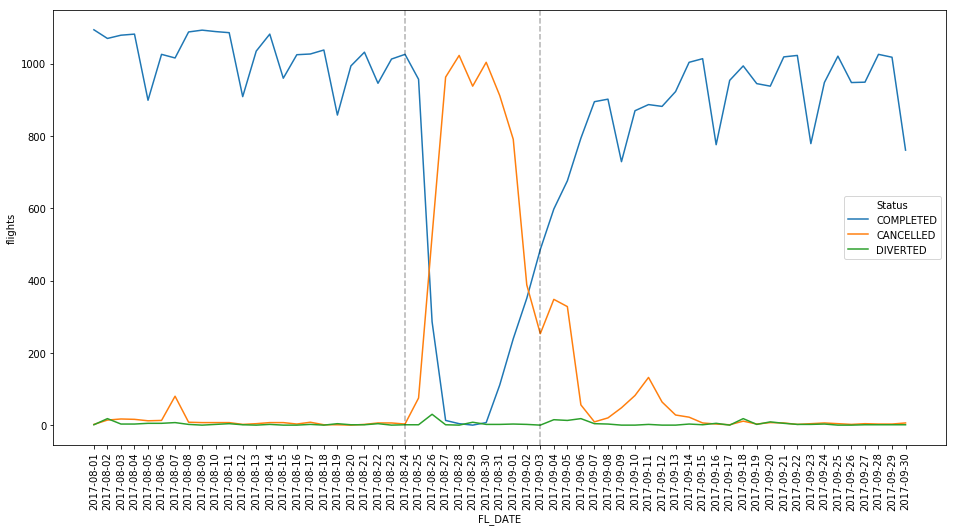

In [47]:
gByDateCCD = houFlights.groupby(['FL_DATE'],as_index=False).sum()[['FL_DATE','COMPLETED','CANCELLED','DIVERTED']]
byDateStatusFlat = gByDateCCD.melt('FL_DATE',var_name ='Status',value_name='flights')
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ax = sns.lineplot(data=byDateStatusFlat,x='FL_DATE',y='flights',hue='Status')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)

## Group by Date and Airline

In [48]:
#gByAirDate = houFlights.groupby(['FL_DATE','CARRIER_NAME'],as_index=False).count()[['FL_DATE','CARRIER_NAME','OP_CARRIER_FL_NUM']].rename(columns={'OP_CARRIER_FL_NUM':'flightsCount'})
gByAirDate = houFlights.groupby(['FL_DATE','CARRIER_NAME'],as_index=False).agg({
    'OP_CARRIER_FL_NUM':'count','CANCELLED':'sum','DIVERTED':'sum','COMPLETED':'sum'}).rename(columns={
    'OP_CARRIER_FL_NUM':'TOTAL'})
gByAirDate.head()
    

FL_DATE CARRIER_NAME  TOTAL  CANCELLED  DIVERTED  COMPLETED
0  2017-08-01       Alaska      4        0.0       0.0          4
1  2017-08-01     American     40        0.0       1.0         39
2  2017-08-01        Delta     28        0.0       0.0         28
3  2017-08-01   ExpressJet    265        0.0       0.0        265
4  2017-08-01     Frontier      8        0.0       0.0          8

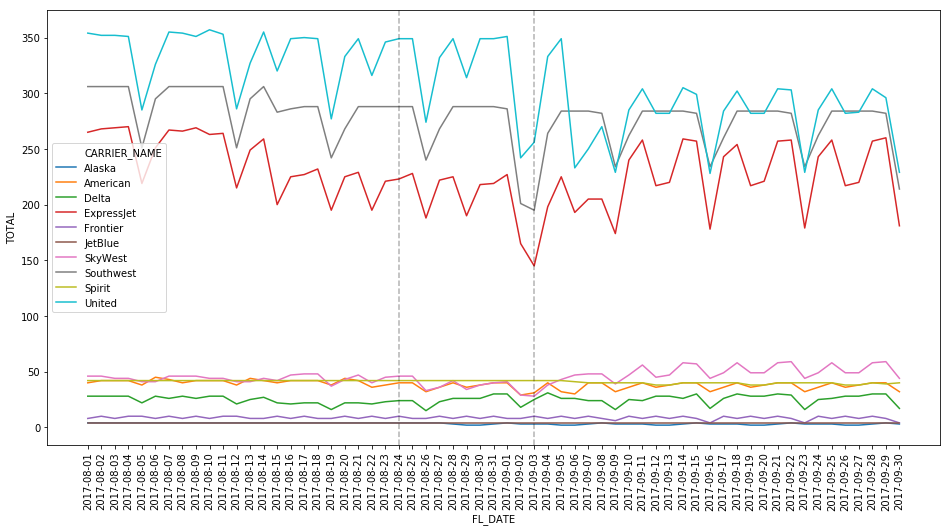

In [49]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='TOTAL',hue='CARRIER_NAME')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)

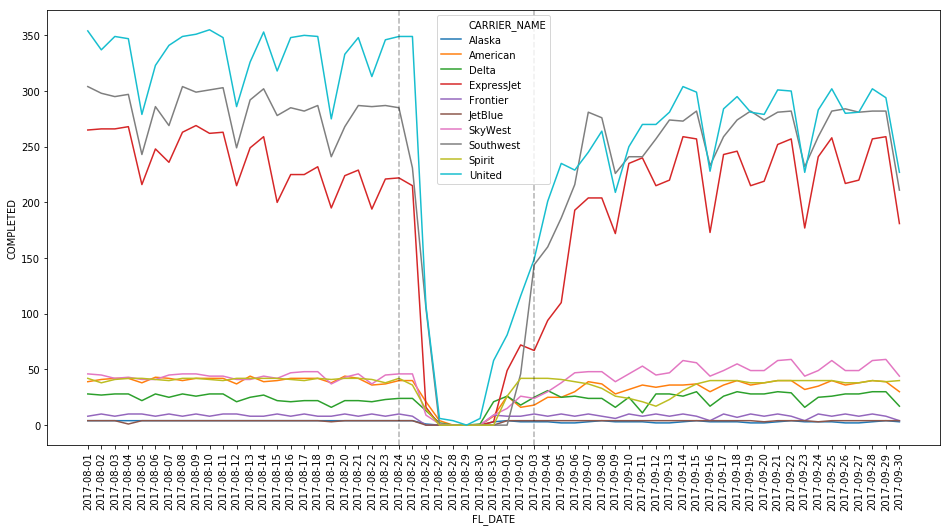

In [50]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='COMPLETED',hue='CARRIER_NAME')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)

(array([24.]), array([35.]))

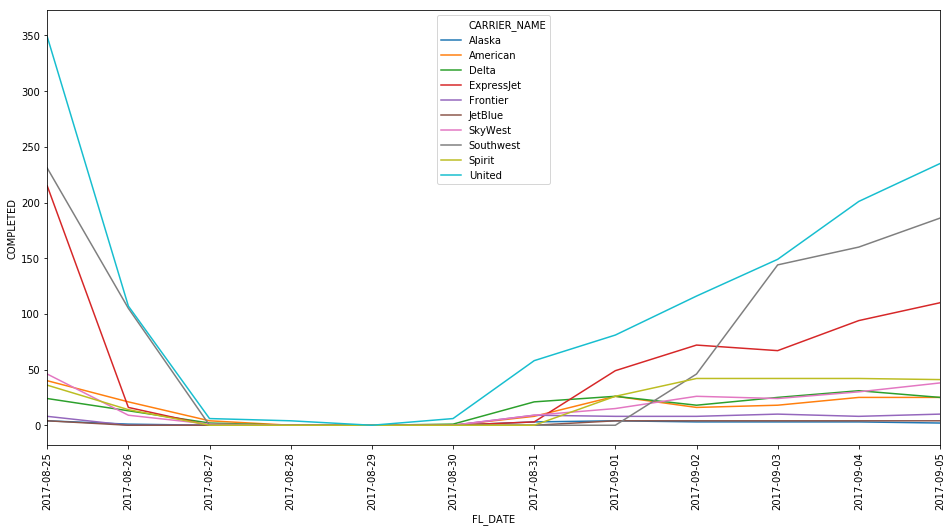

In [51]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='COMPLETED',hue='CARRIER_NAME')
plt.xlim('2017-08-25', '2017-09-05')
#plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
#plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)

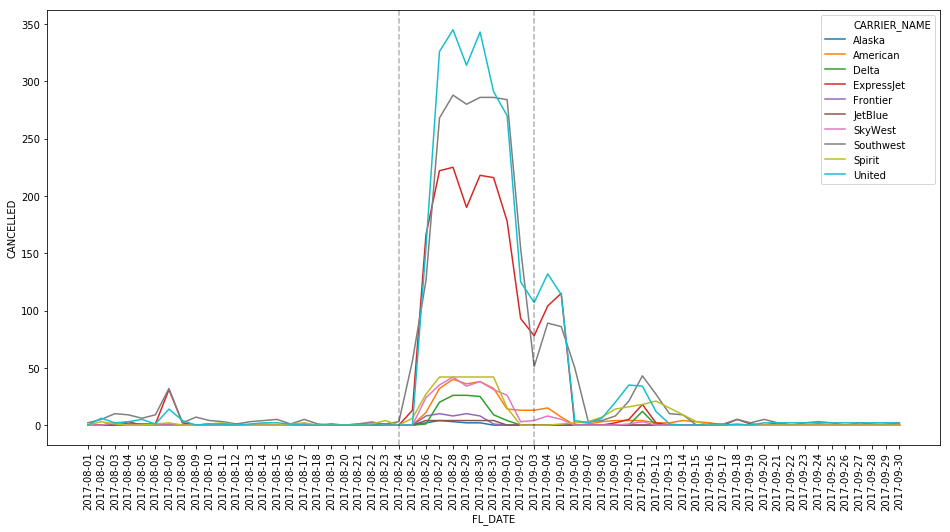

In [52]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='CANCELLED',hue='CARRIER_NAME')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)

(array([23.]), array([37.]))

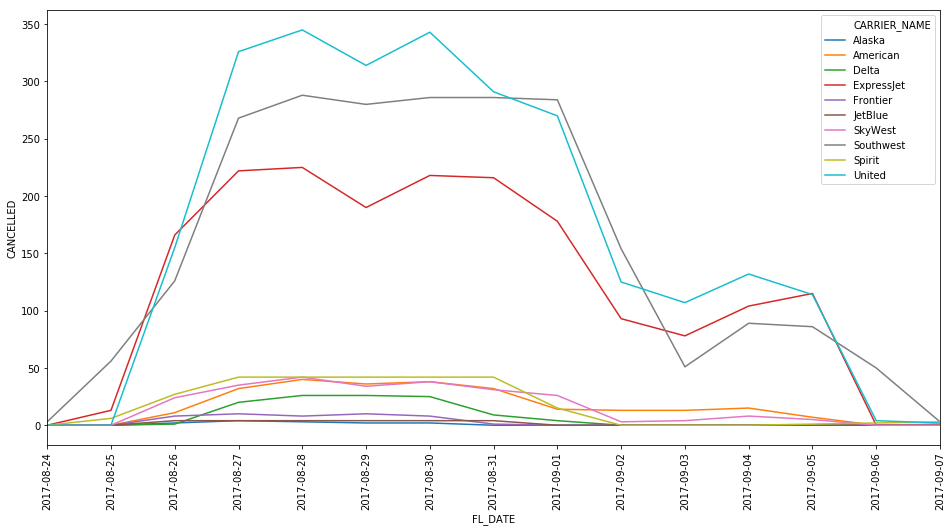

In [53]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='CANCELLED',hue='CARRIER_NAME')
plt.xlim('2017-08-24', '2017-09-07')

### Diversions

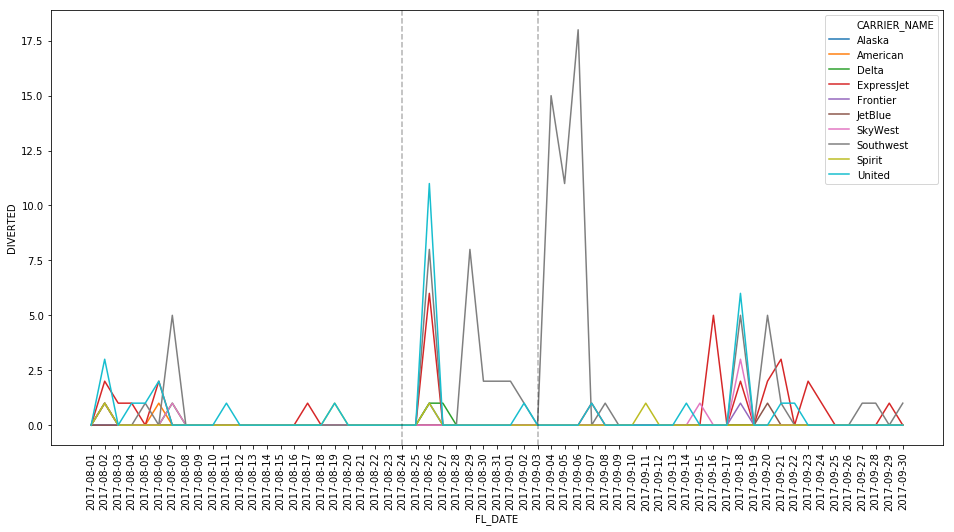

In [54]:
#Counting only Inbpound Diversions
divByDateAndAirline = houFlights[houFlights['INBOUND']==1].groupby(['FL_DATE','CARRIER_NAME'],as_index=False).agg({
    'OP_CARRIER_FL_NUM':'count','DIVERTED':'sum'}).rename(columns={
    'OP_CARRIER_FL_NUM':'TOTAL'})
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=divByDateAndAirline,x='FL_DATE',y='DIVERTED',hue='CARRIER_NAME')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)

In [55]:
houInboundDiversions = houFlights[(houFlights['INBOUND']==1)&(houFlights['DIVERTED']==1)&(houFlights['FL_DATE'] > '2017-08-24')]
len(houInboundDiversions)

138

In [56]:
houInboundDiversions = pd.merge(houInboundDiversions,airports[['Code3','Lat','Lon']],left_on='DIV1_AIRPORT',right_on='Code3',how='left',suffixes=['','_Div'])

In [57]:
len(houInboundDiversions)

138

In [58]:
houInboundDiversions.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DIV_AIRPORT_LANDINGS', 'DIV_REACHED_DEST', 'DIV_ARR_DELAY',
       'DIV_DISTANCE', 'DIV1_AIRPORT', 'DIV1_AIRPORT_ID', 'DIV1_WHEELS_OFF',
       'Unnamed: 68', 'DATE', 'DAY_OF_WEEK_NAME', 'CARRIER_NAME', 'STATUS',
       'COMPLETED', 'INBOUND', 'DEP_HR_BL

In [59]:
houInboundDiversions.rename(columns={'Lat':'Lat_Div','Lon':'Lon_Div'}, inplace=True)
houInboundDiversions.drop(['Code3'],axis=1,inplace=True)

In [60]:
houInboundDiversions.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DIV_AIRPORT_LANDINGS', 'DIV_REACHED_DEST', 'DIV_ARR_DELAY',
       'DIV_DISTANCE', 'DIV1_AIRPORT', 'DIV1_AIRPORT_ID', 'DIV1_WHEELS_OFF',
       'Unnamed: 68', 'DATE', 'DAY_OF_WEEK_NAME', 'CARRIER_NAME', 'STATUS',
       'COMPLETED', 'INBOUND', 'DEP_HR_BL

In [61]:
houInboundDiversions['DIV1_AIRPORT'].value_counts()

AUS    16
MSY    14
SAT    13
DFW    10
DAL     8
CRP     7
LAX     5
HRL     5
AEX     4
ELP     4
ATL     4
CLL     4
LAS     4
PHX     4
PNS     4
SHV     3
TUL     2
OAK     2
IAH     2
TPA     2
LCH     2
LFT     2
DEN     2
OKC     2
MAF     2
COS     1
SAN     1
IND     1
ABQ     1
DTW     1
JAX     1
LIT     1
MCI     1
GRK     1
FLL     1
ORD     1
Name: DIV1_AIRPORT, dtype: int64

In [62]:
#gByOriDest = houFlights.groupby(['ORIGIN','Lat_Ori','Lon_Ori','DEST','Lat_Dest','Lon_Dest']).size().reset_index()
gByDiv = houInboundDiversions.groupby(['DIV1_AIRPORT','Lat_Div','Lon_Div']).size().reset_index()

In [63]:
gByDiv.rename(columns={0:'Count'}, inplace=True)
gByDiv.sort_values(by='Count',ascending=False)

DIV1_AIRPORT    Lat_Div     Lon_Div  Count
3           AUS  30.194500  -97.669899     16
25          MSY  29.993401  -90.258003     14
32          SAT  29.533701  -98.469803     13
9           DFW  32.896801  -97.038002     10
7           DAL  32.847099  -96.851799      8
6           CRP  27.770399  -97.501198      7
19          LAX  33.942501 -118.407997      5
14          HRL  26.228500  -97.654404      5
30          PNS  30.473400  -87.186600      4
1           AEX  31.327400  -92.549797      4
29          PHX  33.434299 -112.012001      4
18          LAS  36.080101 -115.152000      4
11          ELP  31.807199 -106.377998      4
4           CLL  30.588600  -96.363800      4
2           ATL  33.636700  -84.428101      4
33          SHV  32.446602  -93.825600      3
21          LFT  30.205299  -91.987602      2
27          OKC  35.393101  -97.600700      2
26          OAK  37.721298 -122.221001      2
34          TPA  27.975500  -82.533203      2
23          MAF  31.942499 -102.202004      2
35          TUL  36.198399  -95.888100      2
20          LCH  30.126101  -93.223297      2
15          IAH  29.984400  -95.341400      2
8           DEN  39.861698 -104.672996      2
22          LIT  34.729401  -92.224297      1
24          MCI  39.297600  -94.713898      1
17          JAX  30.494101  -81.687897      1
16          IND  39.717300  -86.294403      1
28          ORD  41.978600  -87.904800      1
13          GRK  31.067200  -97.828903      1
12          FLL  26.072599  -80.152702      1
31          SAN  32.733601 -117.190002      1
10          DTW  42.212399  -83.353401      1
5           COS  38.805801 -104.700996      1
0           ABQ  35.040199 -106.609001      1

In [64]:
cities = []
scale = 0.5
colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']

for i in range(len(gByDiv)):
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = gByDiv['Lon_Div'],
        lat = gByDiv['Lat_Div'],
        #text = str(gByDiv['DIV1_AIRPORT'])+str(gByDiv['Count']),
        text = gByDiv['DIV1_AIRPORT'],
        marker = dict(
            size = gByDiv['Count']/scale,
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ))
    cities.append(city)

layout = dict(geo={'scope':'usa'},
             showlegend=False)

fig = dict(data = cities ,layout=layout)
iplot(fig)

There are some diversions to locations such as OAK, LAX, DTW, ORD and Florida that are too far from Houston to be considered last minute diversions. Let us plot the map of their origin and diverted airport to understand what is happening here.

In [65]:
ldDivLoc = ['OAK','LAX','SAN','LAS','PHX','DTW','ORD','TPA','FLL','JAX']
longHouInboundDiversions = houInboundDiversions[houInboundDiversions['DIV1_AIRPORT'].isin(ldDivLoc)].reset_index()

In [66]:
#from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
#import plotly.graph_objs as go
#import cufflinks as cf
#init_notebook_mode(connected=True)
#cf.go_offline()
#import plotly.plotly as py

airportsMap = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = longHouInboundDiversions['Lon_Ori'],
        lat = longHouInboundDiversions['Lat_Ori'],
        hoverinfo = 'text',
        text = longHouInboundDiversions['ORIGIN'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]


flight_paths = []
for i in range( len(longHouInboundDiversions) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ longHouInboundDiversions['Lon_Ori'][i], longHouInboundDiversions['Lon_Div'][i] ],
            lat = [ longHouInboundDiversions['Lat_Ori'][i], longHouInboundDiversions['Lat_Div'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            #opacity = (float(gByOriDest['Count'][i])/float(gByOriDest['Count'].max())),
        )
    )




layout = dict(geo={'scope':'usa'},
             showlegend=False)

fig = dict(data = flight_paths + airportsMap,layout=layout)
iplot(fig)

In [67]:
longHouInboundDiversions[['ORIGIN','DEST','DIV1_AIRPORT','OP_CARRIER','OP_CARRIER_FL_NUM']]

ORIGIN DEST DIV1_AIRPORT OP_CARRIER  OP_CARRIER_FL_NUM
0     ATL  HOU          PHX         WN               1937
1     ATL  HOU          PHX         WN               1937
2     ATL  HOU          PHX         WN               1937
3     ATL  HOU          PHX         WN               1937
4     TPA  HOU          SAN         WN               1549
5     ABQ  HOU          TPA         WN               4786
6     ABQ  HOU          TPA         WN               1802
7     BWI  HOU          LAX         WN               1662
8     BWI  HOU          LAS         WN               4496
9     BWI  HOU          LAX         WN               1662
10    BWI  HOU          OAK         WN               1518
11    BWI  HOU          LAX         WN               1662
12    MCO  HOU          OAK         WN               2007
13    OKC  HOU          LAX         WN               5147
14    RDU  HOU          LAS         WN               1066
15    RDU  HOU          LAS         WN               1066
16    RDU  HOU          LAS         WN               1066
17    SAN  HOU          JAX         WN               4479
18    SAT  HOU          FLL         WN                 18
19    HNL  IAH          LAX         UA                252
20    EWR  IAH          ORD         UA               1261
21    DTW  IAH          DTW         NK                939

The above map confirms my suspicion that these flights are not last minute diversions. Lets look closer at these flights:
- 4 flights from Atlanta to Houston Hobby were diverted to Albuquerqe
- A Tampa to Hobby flight was diverted San Diego
- 5 flights from baltimore to Hobby were diverted to Las vegas and Los Angeles
- The flight numbers are repeating
- Most of these routes belong to Southwest
As no airline will carry enough fuel to divert to a destination too far away from its destination airport, I am assuming that Southwest diverted their flights to the next airport on its route, skipping Houston Hobby.

In [68]:
shortHouInboundDiversions = houInboundDiversions[~houInboundDiversions['DIV1_AIRPORT'].isin(ldDivLoc)].reset_index()

In [69]:
airportsMap = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = shortHouInboundDiversions['Lon_Ori'],
        lat = shortHouInboundDiversions['Lat_Ori'],
        hoverinfo = 'text',
        text = shortHouInboundDiversions['ORIGIN'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]


flight_paths = []
for i in range( len(shortHouInboundDiversions) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ shortHouInboundDiversions['Lon_Ori'][i], shortHouInboundDiversions['Lon_Div'][i] ],
            lat = [ shortHouInboundDiversions['Lat_Ori'][i], shortHouInboundDiversions['Lat_Div'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            #opacity = (float(gByOriDest['Count'][i])/float(gByOriDest['Count'].max())),
        )
    )




layout = dict(geo={'scope':'usa'},
             showlegend=False)

fig = dict(data = flight_paths + airportsMap,layout=layout)
iplot(fig)

The above map shows that most eastbound flights were diverted to Austin, San Antonio and South Padre. Most westbound flights were diverted to Dallas and New Orleans

## Rain Data

In [71]:
weather_hou = pd.read_csv('Weather_HOU.csv')
weather_hou.head()

STATION                                    NAME      DATE  AWND  PRCP  \
0  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/1/2017  7.61  0.00   
1  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/2/2017  4.70  0.26   
2  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/3/2017  5.14  0.00   
3  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/4/2017  4.25  0.00   
4  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/5/2017  5.14  0.29   

   TAVG  TMAX  TMIN  
0    87    95    80  
1    83    91    77  
2    82    94    77  
3    85    95    77  
4    84    95    77

In [72]:
weather_hou.drop(['STATION','NAME'],axis=1,inplace=True)
weather_hou.columns

Index(['DATE', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [73]:
weather_hou['DATE'] = pd.to_datetime(weather_hou['DATE'],format='%m/%d/%Y')

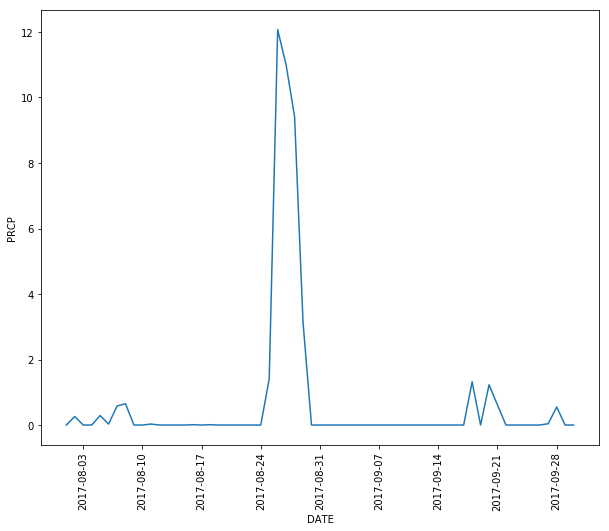

In [74]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.lineplot(data=weather_hou,x='DATE',y='PRCP')
plt.show()

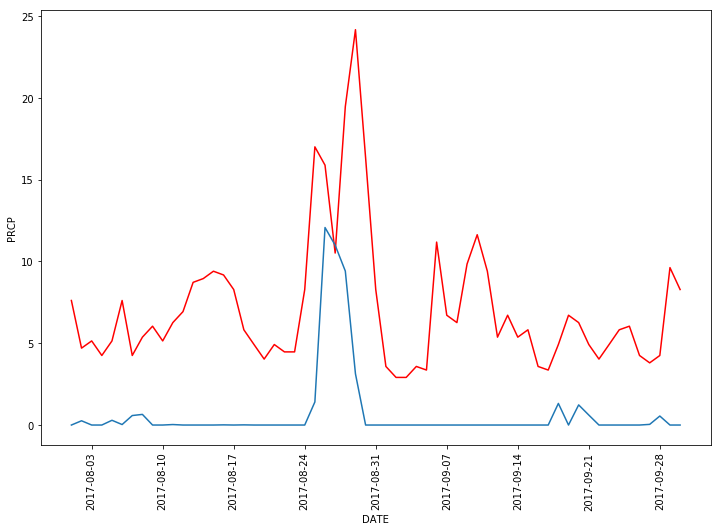

In [75]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.lineplot(data=weather_hou,x='DATE',y='AWND',color='red')
sns.lineplot(data=weather_hou,x='DATE',y='PRCP')
plt.show()

In [85]:
weather_iah = pd.read_csv('weather_iah.csv')
weather_iah.drop(['STATION','NAME','LATITUDE','LONGITUDE','ELEVATION'],axis=1,inplace=True)
weather_iah['DATE'] = pd.to_datetime(weather_iah['DATE'],format='%Y-%m-%d')

In [92]:
weather_iah = weather_iah[weather_iah['DATE']<'2017-10-01']

In [93]:
weather_iah['DATE'].min()

Timestamp('2017-08-01 00:00:00')

No handles with labels found to put in legend.


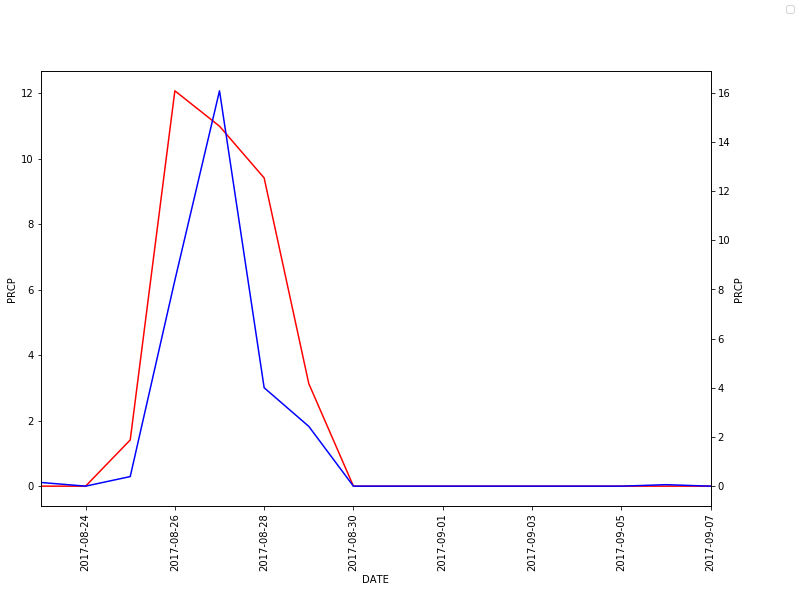

In [103]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
ax = sns.lineplot(data=weather_hou,x='DATE',y='PRCP',color='red',legend=False)
ax2 = ax.twinx()
sns.lineplot(data=weather_iah,x='DATE',y='PRCP',color='blue',legend=False,ax=ax2)
#sns.regplot(data=weather_hou,x='DATE',y='PRCP')
#sns.regplot(data=weather_iah,x='DATE',y='PRCP')
ax.figure.legend()
plt.xlim('2017-08-23', '2017-09-07')
plt.show()